In [6]:
# !unzip -uq "dataset_imageprocessing.zip" -d "dataset_imageprocessing"

In [8]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Reshape, Permute, Activation, Input, merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

import sys
import os
import glob
import cv2, numpy as np

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sessions = tf. Session(config=config)

In [3]:
# Transfer learning(MobileNetV2)

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.applications.mobilenet_v2 import MobileNetV2  
from keras.applications.mobilenet import MobileNet

input_shape = (150, 150, 3)
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# 미세 조정
base_model.trainable=True

set_trainable=False
for layer in base_model.layers:
    if layer.name == 'out_relu': # 쌓은 층 직전까지 동결
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False


x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
dropout = Dropout(0.3)(x)
output = Dense(3, activation='softmax', name='predictions')(dropout)
model = Model(inputs=base_model.input, output=output)

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


In [24]:
# CNN model
# cnn2

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 128)     

In [25]:
# ImagedataGenerator 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train data load 
train_set = train_datagen.flow_from_directory('dataset_imageprocessing/dataset_imageprocessing/train/', 
                                              target_size=(150, 150), 
                                              class_mode='categorical', 
                                              batch_size=256)

# val data load 
test_set = test_datagen.flow_from_directory('dataset_imageprocessing/dataset_imageprocessing/test/', 
                                            target_size=(150, 150), 
                                            class_mode='categorical', 
                                            batch_size=256)

# fit model
history = model.fit_generator(train_set,
                              epochs = 10,
                             validation_data = test_set)

Found 37615 images belonging to 3 classes.
Found 9403 images belonging to 3 classes.
Epoch 1/10
147/147 [==============================] - 214s 1s/step - loss: 1.1269 - accuracy: 0.4649 - val_loss: 1.4337 - val_accuracy: 0.3675
Epoch 2/10
147/147 [==============================] - 199s 1s/step - loss: 0.5585 - accuracy: 0.7697 - val_loss: 4.1305 - val_accuracy: 0.3675
Epoch 3/10
147/147 [==============================] - 200s 1s/step - loss: 0.2879 - accuracy: 0.8898 - val_loss: 4.9546 - val_accuracy: 0.3676
Epoch 4/10
147/147 [==============================] - 198s 1s/step - loss: 0.2020 - accuracy: 0.9242 - val_loss: 2.0318 - val_accuracy: 0.6112
Epoch 5/10
147/147 [==============================] - 199s 1s/step - loss: 0.1532 - accuracy: 0.9420 - val_loss: 0.4688 - val_accuracy: 0.8840
Epoch 6/10
147/147 [==============================] - 199s 1s/step - loss: 0.1241 - accuracy: 0.9544 - val_loss: 0.1808 - val_accuracy: 0.9353
Epoch 7/10
147/147 [==============================] - 198

In [26]:
output = model.predict_generator(test_set)

In [11]:
print(test_set.class_indices)

{'E01': 0, 'E02': 1, 'E03': 2}


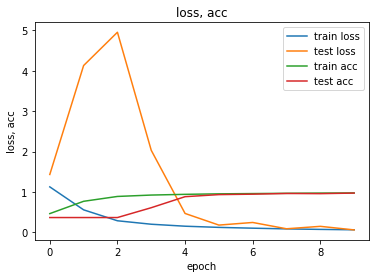

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('loss, acc')
plt.xlabel('epoch')
plt.ylabel('loss, acc')
plt.legend(['train loss', 'test loss', 'train acc', 'test acc'])
plt.show()

In [13]:
test_path = "dataset_pred/E01" # 무표정
test_path2 = "dataset_pred/E02" # 기쁨 
test_path3 = "dataset_pred/E03" # 찡그림

X=[]

def read_dir1(path):
    
    files = glob.glob(path + "/*.jpg")
    if bool(files) == False:
        files = glob.glob(path + "/*.png") 
     
    for f in files:

        try:
            img = image.load_img(f, target_size=(xsize,ysize))
            img_tr= image.img_to_array(img)        
            img_tr /= 255.
            X.append(img_tr)
        except:
            pass

In [28]:
pred_datagen = ImageDataGenerator(rescale=1./255)

pred_set1 = pred_datagen.flow_from_directory('dataset_pred/', 
                                              target_size=(150, 150), 
                                              class_mode='categorical')
pred = model.predict_generator(pred_set1)

co=0
for i in range(2880):
    result = np.argmax(pred[i])
    print(result, end='')
    if result==0:
        co+=1
        
print('\n', "%.2f" % (co/2880.))

Found 8640 images belonging to 3 classes.
0100021200100112111121120121222020210200001222002110201221011022011210020221021212122102102202020222120001002101202002010200021120102011210221202011200212222222010021222010002000001100202101120022100010112020201110020222001200221200220122010100002001211222220120111202220221120012021200201122120001010220020000200102101202221211201000112100122220202002121221021102102202022110100122020101200010002012212020011202221011020011102011220000000111120121102011220200212221000022122010220101020021112001000201100021112010202002210122120122112210112102020012010102021110120111110012021121222000002021202212020220012100022212101011021021201012222010110022100120011221010012011221012200210100122200020010200111111200012200001201220011111200022200011010122222211212220212001110000200001120012111100012020002201201102001212002001222222100002102021221002122201002020010121021110020000112202011112012022022102102010100221112022002011011012202111120000222020020101112012211

In [29]:
model.save('./save/cnn(imagegenerator).h5')
print('모델 저장이 완료되었습니다.')

모델 저장이 완료되었습니다.
